<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/CSCI_680_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##References:
1) https://stackoverflow.com/questions/32857544/nested-list-to-pandas-dataframe-with-headers

2) 
https://www.jeansnyman.com/posts/regression-with-scikit-learn/


3) https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html

4) https://stackoverflow.com/questions/5306079/python-how-do-i-convert-an-array-of-strings-to-an-array-of-numbers



#Assignment 5
For Assignment 5, you are required to train and interpret models using wine-quality dataset.  You can access the data from the following link. There are two csv files available on the link, but you only need to work on white-wine dataset. Treat this dataset as a regression problem where 1 is poor and 10 is excellent quality. Divide the dataset into training and testing. Use R-squared metrics for model evaluation. 

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/ 


In [2]:
#import pandas
import pandas as pd

I have uploaded the data to github. Therefore, it can be downloaded from github directly

In [3]:
url = 'https://raw.githubusercontent.com/Sauravhuskie/CSCI-680---Applied-Machine-Learning/main/winequality-white.csv'
df1 = pd.read_csv(url , header = None) #creating data frame

In [4]:
#for loop to manipulate dataframe.
i=1
rows = []
for i in range (df1.size):
  tempRow = df1[0][i].split(';')#tempRow is for holding rows
  tempRow = [element.strip('"') for element in tempRow]
  if (i>0):
   tempRow = [float(i) for i in tempRow]
  rows.append(tempRow)  


In [5]:
#Crating Pandas dataframe
df = pd.DataFrame(rows[1:],columns=rows[0])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


#Question1: Train a Random Forest Regressor for the dataset. Find the best model based on R-squared value using RandomizedSearchCV. [20 Marks]

##Trainng Random forest Dataset

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor


X = df.drop("quality", axis=1)
y = df["quality"]

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)





RandomForestRegressor()

## best model based on R-squared value using RandomizedSearchCV.

In [ ]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Setup RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(estimator=model,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            # verbose=2) # print out results
                            )

# Fit the RandomizedSearchCV version of clf
rs_model.fit(X_train, y_train)

# Find the best hyperparameters found by RandomizedSearchCV
rs_model.best_params_

# Make predictions with the best hyperparameters
rs_y_preds = model.predict(X_test)

# Evaluate the model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, rs_y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, rs_y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, rs_y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.52
MAE: 0.45
MSE: 0.38


In [ ]:
print ("Best model Parameters \n", rs_model.best_params_)


Best model Parameters 
 {'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


 Best Model Parameters:
 1. 'n_estimators': 1200
 2. 'min_samples_split': 4
 3. 'min_samples_leaf': 1
 4. 'max_features': 'sqrt'
 5. 'max_depth': 20


#Question 2: Use the model from question 1 for model interpretation and rank the features based on permutation importance. [15 Marks] 

In [ ]:
rf = RandomForestRegressor(n_estimators=1200, min_samples_split = 2,min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1200)

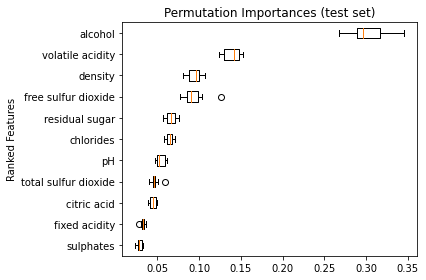

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_ylabel("Ranked Features")
fig.tight_layout()
plt.show()

In [ ]:
irf= pd.DataFrame(range(11,0,-1),list(X_test.columns[sorted_idx][0:]))
col_names = ["Permutation Importance Rank"]
irf.columns = col_names
df.index.name='Feature'
display(irf)

,Permutation Importance Rank
sulphates,11
fixed acidity,10
citric acid,9
total sulfur dioxide,8
pH,7
chlorides,6
residual sugar,5
free sulfur dioxide,4
density,3
volatile acidity,2


#Question3. Use the model from question 1 for model interpretation and interpret first sample from test data using SHAP algorithm. Install SHAP using pip. See one example - 
https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Diabetes%20regression.html  

[20 Marks]

In [2]:
!pip install shap #installing SHAP

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [8]:
Xa = df.drop("quality", axis=1)
ya = df["quality"]

In [11]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=0.2)
from sklearn.ensemble import RandomForestRegressor

# Institate and fit the model (on the training set)
rf = RandomForestRegressor(n_estimators=1200, min_samples_split = 2,min_samples_leaf= 1, max_features= 'sqrt', max_depth= 30)
rf.fit(Xa_train, ya_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=1200)

In [10]:
import shap
import time
import numpy as np
# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
Xa_train_summary = shap.kmeans(Xa_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars
shap.initjs()

Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


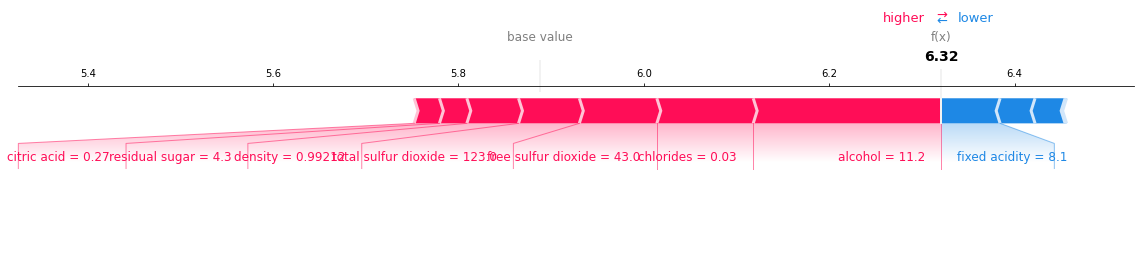

In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)
    shap_values = ex.shap_values(Xa_test.iloc[0,:])
    shap.force_plot(ex.expected_value, shap_values, Xa_test.iloc[0,:], matplotlib=True)
    shap.initjs()


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/15 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

[[ 5.16904318e-02 -8.32498089e-02  8.01688814e-02  1.21320853e-01
  -4.12326570e-02  4.07112735e-02  4.64375702e-02 -3.13577634e-02
   4.62777135e-03  3.81051873e-02 -1.40412148e-01]
 [ 1.84027284e-02 -5.10266088e-02 -1.47162204e-01  3.24112363e-02
   5.76697948e-02  6.59949372e-02  3.91657593e-02  5.01167927e-02
  -2.16090661e-02 -3.39496211e-02  2.05962509e-01]
 [ 1.31960679e-02 -1.42166989e-01  5.72036699e-03  9.02636490e-02
  -4.84703906e-02  7.87711900e-02  9.81273140e-03 -4.89875823e-02
  -1.06746177e-02  5.23989422e-02 -1.76387110e-01]
 [ 3.09634662e-02  2.59640129e-01  4.48827185e-03  1.18680777e-01
  -3.27111511e-04  2.07982209e-02  7.80929596e-03 -5.22867892e-02
   8.74576547e-03 -2.23517943e-02 -2.02683973e-01]
 [ 7.15384455e-03 -1.66444246e-02  3.32487887e-02  2.84655308e-02
   1.26373378e-01  3.96212591e-02  4.96505467e-02  1.99673243e-01
  -5.93733295e-03 -1.23005796e-02  5.81672005e-01]
 [-1.28093032e-02 -1.44725202e-01  1.32235031e-02  6.02031568e-02
  -7.89113411e-02  

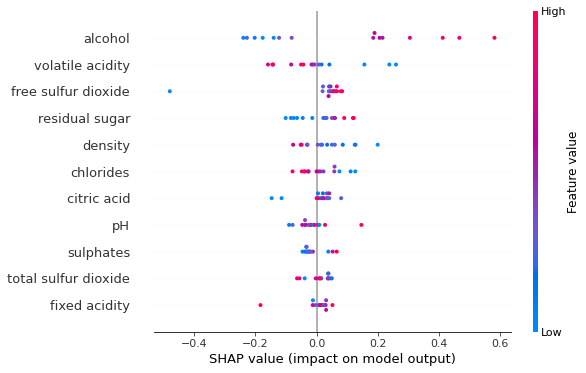

In [14]:
xa = Xa_test.iloc[:15]
ex = shap.KernelExplainer(rf.predict, Xa_train.values)
shap_values = ex.shap_values(xa)
print(shap_values)
shap.summary_plot(shap_values,xa)
shap.initjs()



In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ex = shap.KernelExplainer(rf.predict, Xa_train.values)

Using 3918 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
xa = Xa_test.iloc[:10]
shap_values = ex.shap_values(xa)
shap.force_plot(ex.expected_value, shap_values, Xa_test)
shap.initjs()

  0%|          | 0/10 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

In [ ]:
shap.force_plot(ex.expected_value, shap_values, Xa_test)


#Question 4: Visualize partial dependence plot for each feature in the dataset using Sklearn. [15 Marks]  

In [6]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor()

In [7]:
X1 = df.drop("quality", axis=1)
y1 = df["quality"]


In [8]:
X3 = X1[:].values
y3 = y1[:].values


In [9]:
y = [float(numeric_string) for numeric_string in y3]
X = [[float(string) for string in inner] for inner in X3]


In [10]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf1.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
features = list(X1.columns.values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


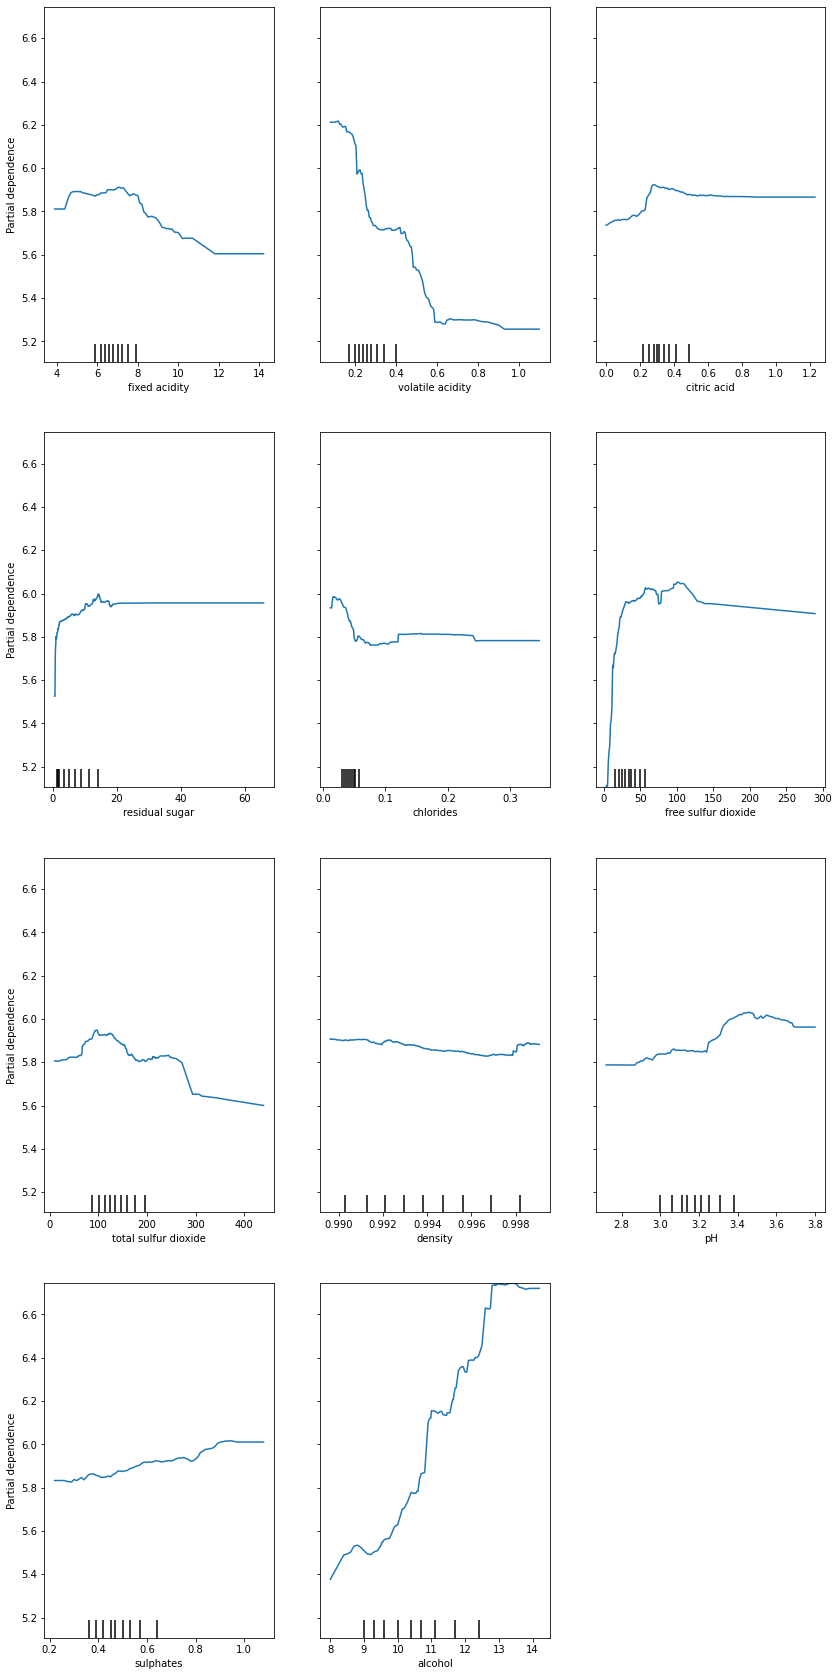

In [13]:
import matplotlib.pyplot as plt
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(14, 30))
plot_partial_dependence(rf1, X_train, range(11), n_cols= 3,feature_names=features, grid_resolution=500, ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


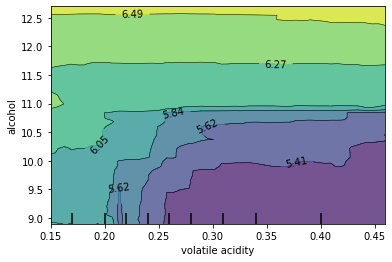

In [15]:
import numpy as np
plot_partial_dependence(
    rf1, X_train, [np.argsort(rf1.feature_importances_)[-2:]],
    feature_names=features, n_jobs=3, grid_resolution=50)

#Question 5: Visualize ICE plot for each feature using Sklearn.     [15 Marks] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
No handles with labels found to put in legend.


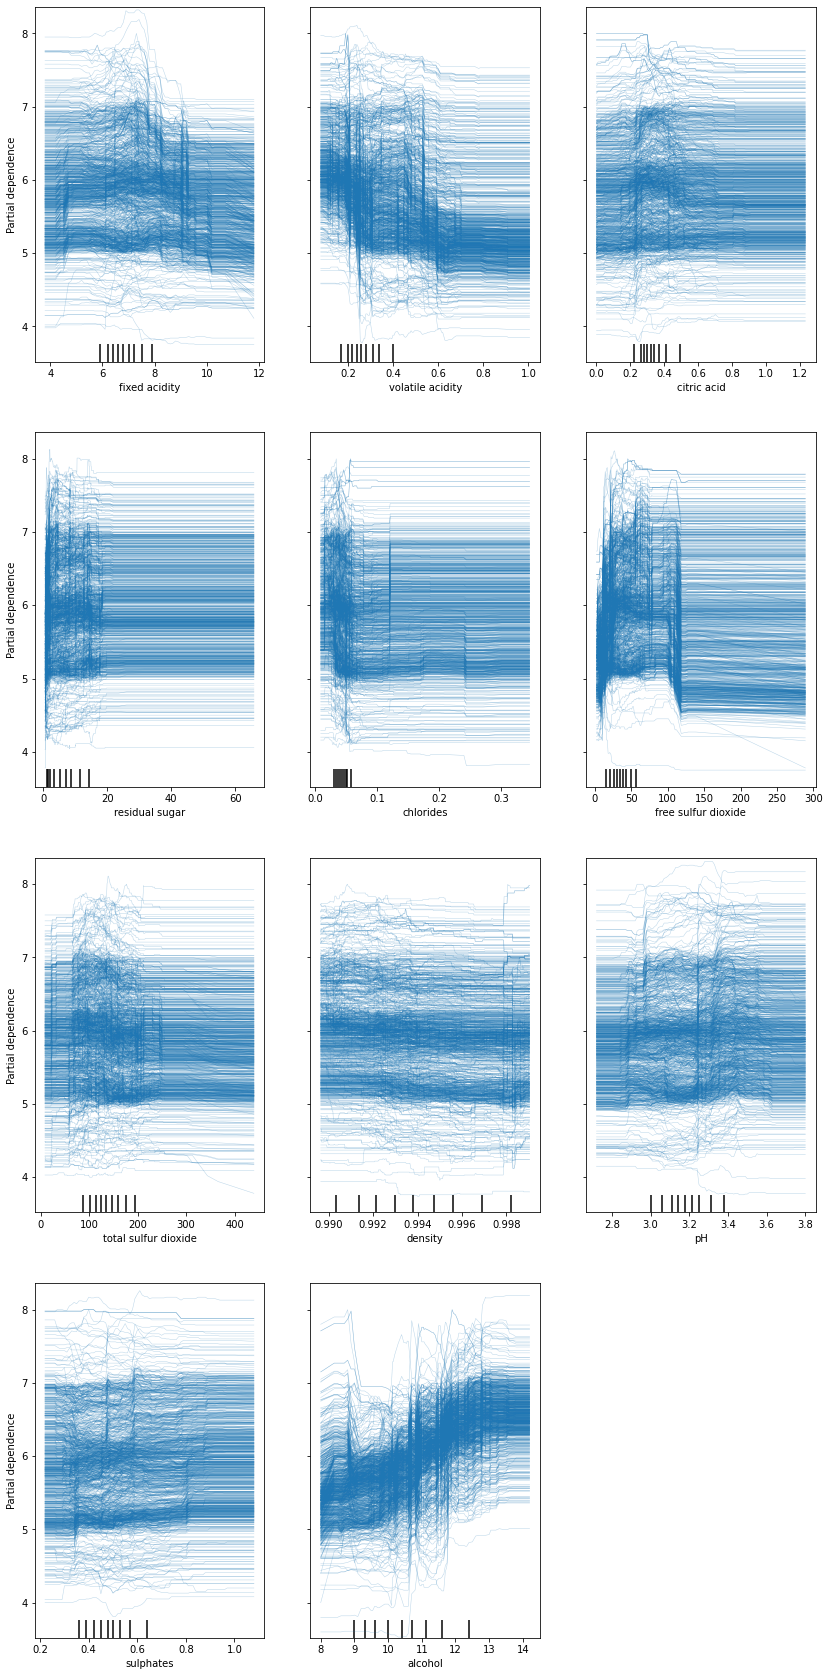

In [ ]:
fig, ax = plt.subplots(figsize=(14, 30))
plot_partial_dependence(rf1, X_train, range(11), n_cols= 3,feature_names=features, grid_resolution=500, ax=ax,kind='individual' )
ax.legend()
plt.show()

#Question 6: Write a brief report on which technique you found most useful and why.
 [15 Marks] 